In [1]:
import arviz as az
from risk_experiment.utils.data import get_all_behavior
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
import scipy.stats as ss

dist = ss.norm(loc=3.5, scale=1./ss.norm().ppf(0.8) * (3.5-1))

In [3]:
df = get_all_behavior(bids_folder='/data/ds-risk')

100%|██████████| 30/30 [00:01<00:00, 18.17it/s]


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45777/2032188372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'bin(risky/safe)']).mean()


Text(0.5, 1.05, 'Raw response curves')

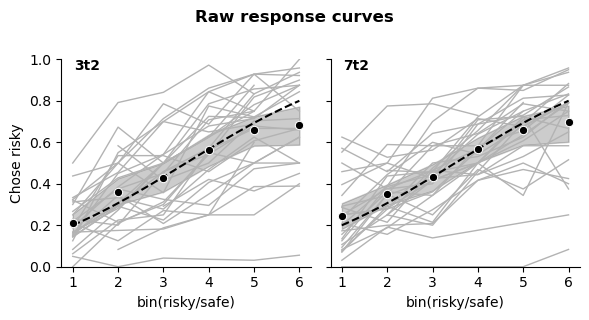

In [4]:
tmp = df.reset_index().groupby(['subject','session', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', color='k', linewidth=0.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw response curves', fontweight='bold', y=1.05)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45777/4094888591.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_45777/4094888591.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()


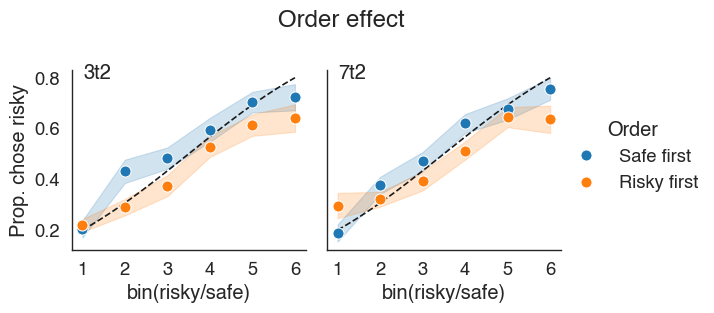

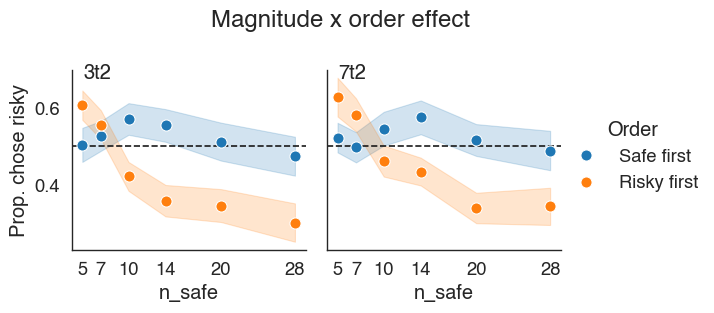

In [24]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

g.add_legend()

tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()

g.savefig('/data/ds-risk/derivatives/figures/order_effect.pdf')

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)

for session, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

g.add_legend()
g.savefig('/data/ds-risk/derivatives/figures/mag_order_effect.pdf')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_23720/1200842170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'uncertainty', 'bin(risky/safe)', 'n_safe']).mean()


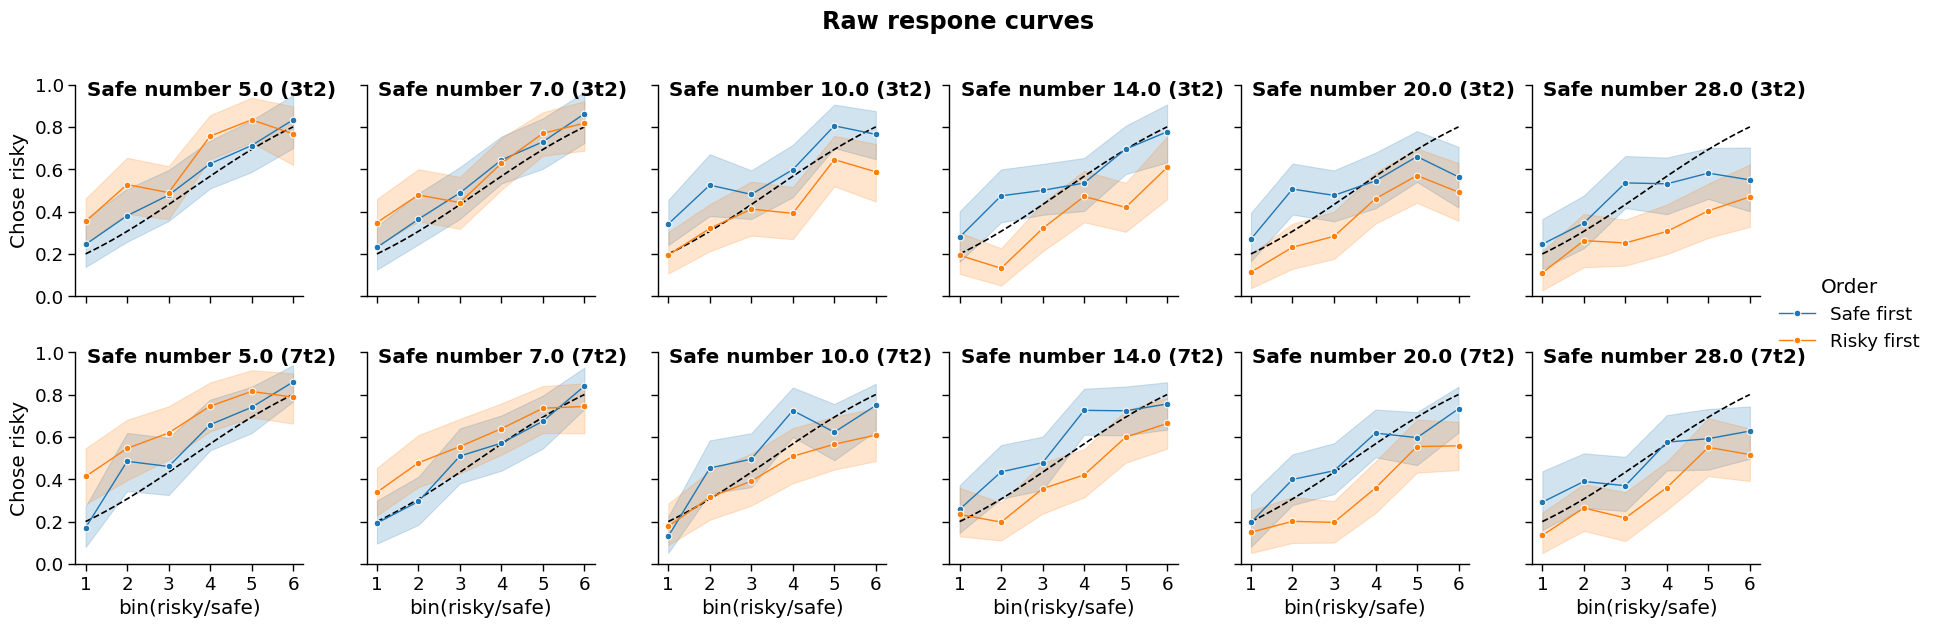

In [36]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'uncertainty', 'bin(risky/safe)', 'n_safe']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),row='session', hue='Order', col='n_safe', hue_order=['Safe first', 'Risky first'])
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for d, ax in g.axes_dict.items():
    ax.text(.05, .95, f'Safe number {d[1]} ({d[0]})', transform=ax.transAxes, fontweight="bold")
    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2559932503.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)']).mean().reset_index(), col='session', palette='coolwarm')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


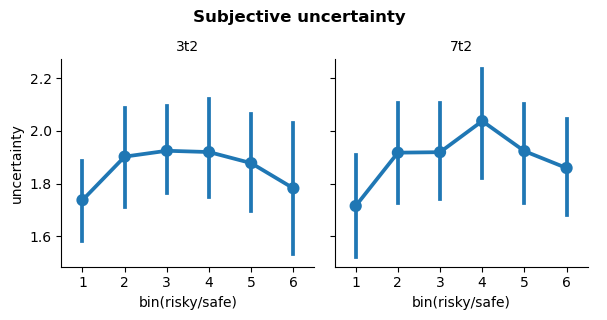

In [7]:
g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)']).mean().reset_index(), col='session', palette='coolwarm')
g.map(sns.pointplot, 'bin(risky/safe)', 'uncertainty')
g.add_legend()
g.fig.suptitle('Subjective uncertainty', y=1.05, fontweight='bold')

g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/3410963002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)', 'chose_risky']).mean().reset_index(), col='session', hue='chose_risky', palette='coolwarm')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


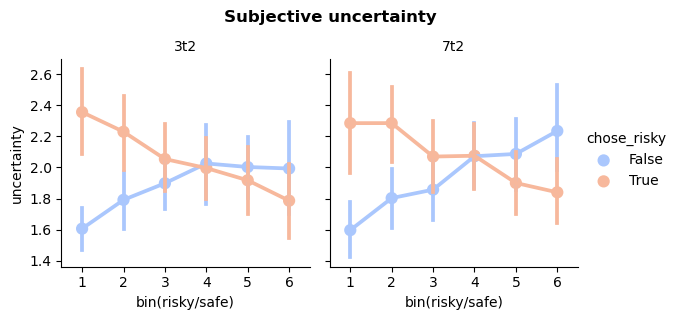

In [8]:
g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)', 'chose_risky']).mean().reset_index(), col='session', hue='chose_risky', palette='coolwarm')
g.map(sns.pointplot, 'bin(risky/safe)', 'uncertainty')
g.add_legend()
g.fig.suptitle('Subjective uncertainty', y=1.05, fontweight='bold')

g.set_titles('{col_name}')

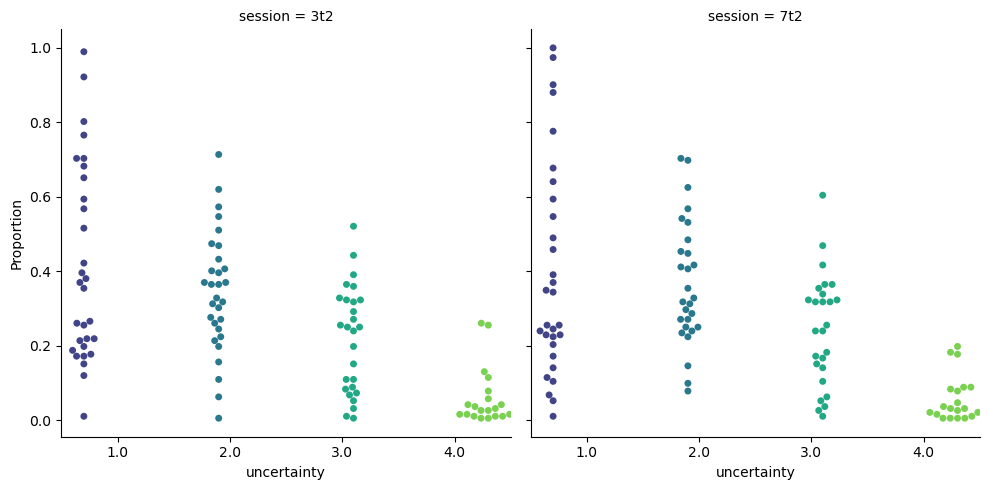

In [9]:
prop = (df.groupby(['subject', 'session', 'uncertainty']).size() / df.groupby(['subject', 'session']).size()).to_frame('Proportion')

sns.catplot(data=prop.reset_index(), x='uncertainty', y='Proportion', hue='uncertainty', palette=sns.color_palette('viridis', n_colors=4), dodge=True, col='session', kind='swarm')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/1240398108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe', 'uncertainty']).mean()


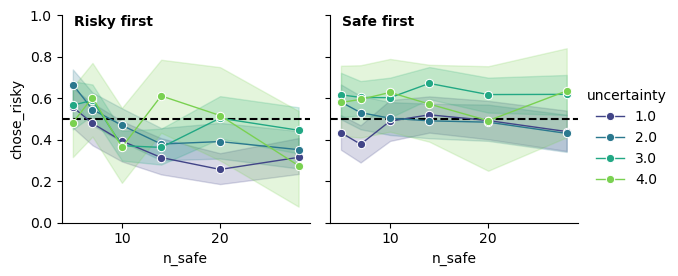

In [10]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette=sns.color_palette('viridis',n_colors=4))
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')



g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
# g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2522612158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'uncertainty']).mean()


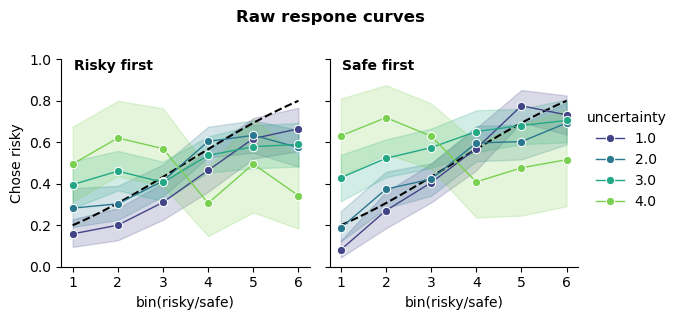

In [11]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    # sns.lineplot(
    #     data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
    #     estimator=None, linewidth=1, ax=ax, hue='risky_first',
    # )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/1910364759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'uncertainty']).mean()


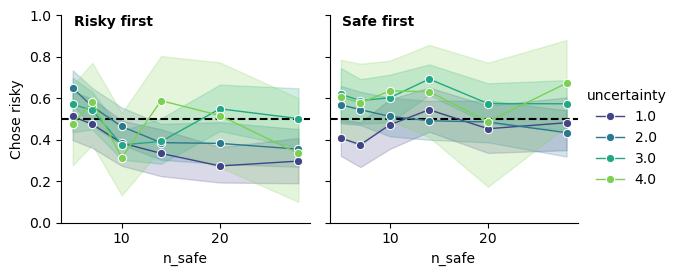

In [12]:
tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky')

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2974030771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'median_split_uncertainty']).mean()


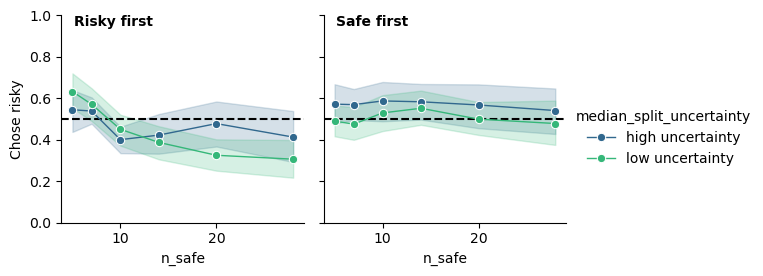

In [13]:
tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'median_split_uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='median_split_uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky')

g.add_legend()

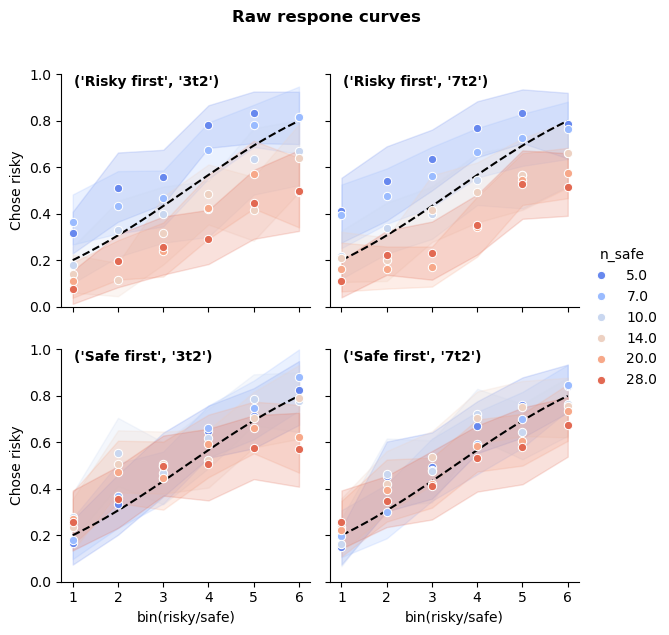

In [ ]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'n_safe']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='n_safe', row='Order', palette='coolwarm')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    # sns.lineplot(
    #     data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
    #     estimator=None, linewidth=1, ax=ax, hue='risky_first',
    # )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw response curves', fontweight='bold', y=1.05)

g.add_legend()